In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np

In [2]:
data_frame = pd.read_csv("veri-seti.txt", delimiter="\t")
data_frame.head()

,Nprg,PlGlu,DiaBlo,Thic,SerIns,BMI,DiaPed,Age,ClaVar,Unnamed: 9,Unnamed: 10
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN


In [3]:
data_frame = data_frame.drop("Unnamed: 9", axis = 1)
data_frame = data_frame.drop("Unnamed: 10", axis = 1)

In [4]:
X = data_frame.drop('ClaVar', axis=1)
y = data_frame['ClaVar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
mlp_param_grid = {
    'hidden_layer_sizes': [(25,25), (50,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [900, 1000]
}

In [7]:
mlp = MLPClassifier(random_state=13)
mlp_grid_search = GridSearchCV(estimator=mlp, param_grid=mlp_param_grid, scoring='accuracy', cv=10, n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=13), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(25, 25), (50,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [900, 1000], 'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [8]:
best_mlp = mlp_grid_search.best_estimator_

mlp_test_pred = best_mlp.predict(X_test)

In [9]:
conf_matrix = confusion_matrix(y_test, mlp_test_pred)

In [10]:
classification_report = classification_report(y_test, mlp_test_pred, output_dict=True)

In [11]:
mlp_test_roc_auc = roc_auc_score(y_test, best_mlp.predict_proba(X_test)[:,1])

In [12]:
class_report__df = pd.DataFrame(classification_report).transpose()
conf_matrix_df = pd.DataFrame(conf_matrix).transpose()
class_report__df, conf_matrix_df

(              precision    recall  f1-score     support
 0              0.787500  0.875000  0.828947  144.000000
 1              0.746479  0.609195  0.670886   87.000000
 accuracy       0.774892  0.774892  0.774892    0.774892
 macro avg      0.766989  0.742098  0.749917  231.000000
 weighted avg   0.772050  0.774892  0.769418  231.000000,
      0   1
 0  126  34
 1   18  53)

In [13]:
from sklearn.metrics import roc_curve
mlp_test_fpr, mlp_test_tpr, _ = roc_curve(y_test, best_mlp.predict_proba(X_test)[:, 1])

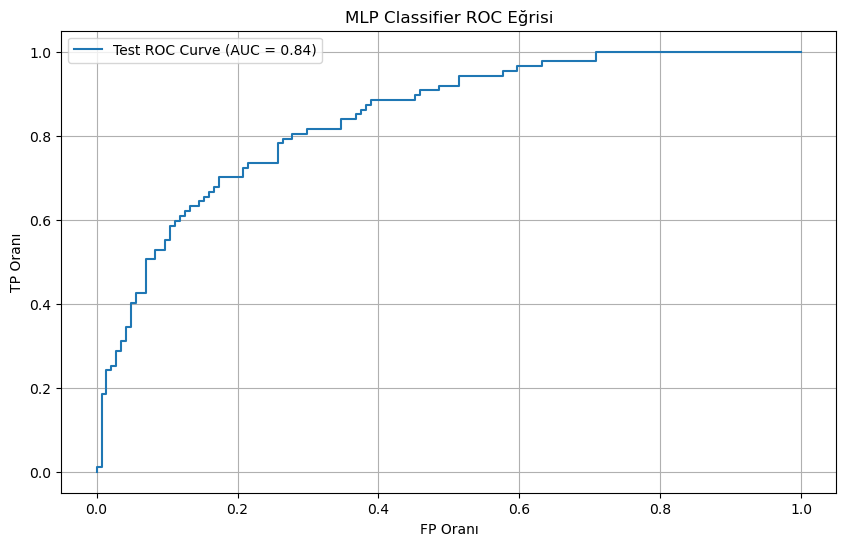

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(mlp_test_fpr, mlp_test_tpr, label=f'Test ROC Curve (AUC = {mlp_test_roc_auc:.2f})')
plt.xlabel('FP Oranı')
plt.ylabel('TP Oranı')
plt.title('MLP Classifier ROC Eğrisi')
plt.legend(loc='best')
plt.grid(True)
plt.show()

SVM

In [17]:
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability=True, random_state=13)
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, scoring='accuracy', cv=5, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=13), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [38]:
best_svm = svm_grid_search.best_estimator_

# Tahminler
svm_test_pred = best_svm.predict(X_test)


In [39]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

conf_matrix = confusion_matrix(y_test, svm_test_pred)

classification_report = classification_report(y_test, svm_test_pred, output_dict=True)

svm_test_roc_auc = roc_auc_score(y_test, best_svm.predict_proba(X_test)[:,1])

svm_test_fpr, svm_test_tpr, _ = roc_curve(y_test, best_svm.predict_proba(X_test)[:, 1])


In [40]:
class_report__df = pd.DataFrame(classification_report).transpose()
conf_matrix_df = pd.DataFrame(conf_matrix).transpose()
class_report__df, conf_matrix_df

(              precision    recall  f1-score     support
 0              0.760479  0.881944  0.816720  144.000000
 1              0.734375  0.540230  0.622517   87.000000
 accuracy       0.753247  0.753247  0.753247    0.753247
 macro avg      0.747427  0.711087  0.719618  231.000000
 weighted avg   0.750648  0.753247  0.743579  231.000000,
      0   1
 0  127  40
 1   17  47)

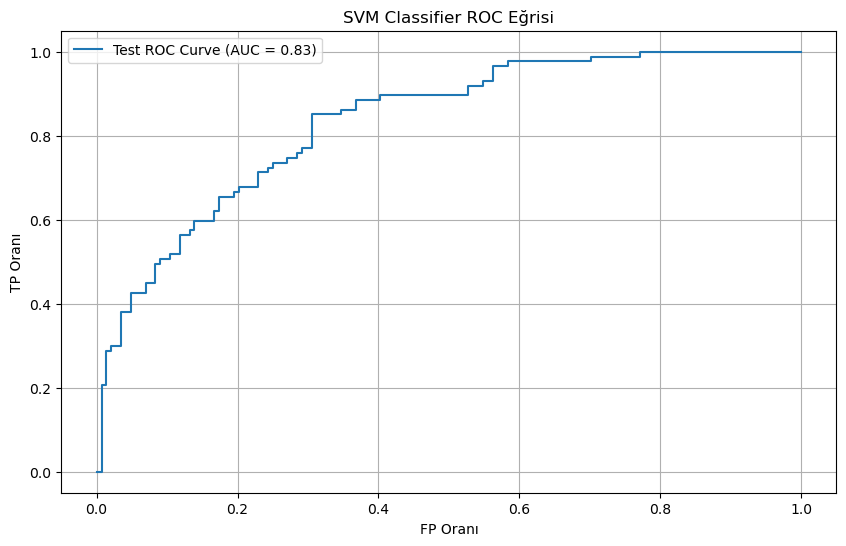

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(svm_test_fpr, svm_test_tpr, label=f'Test ROC Curve (AUC = {svm_test_roc_auc:.2f})')
plt.xlabel('FP Oranı')
plt.ylabel('TP Oranı')
plt.title('SVM Classifier ROC Eğrisi')
plt.legend(loc='best')
plt.grid(True)
plt.show()
